# Выполнил Кирилл Сетдеков

In [50]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import scipy
from scipy import stats
from statsmodels.stats.weightstats import *
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.descriptivestats import sign_test

from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf


#  Задание 1

1. Что можно сказать про случайные величины $X$ и $Y$, если $Corr(X, Y) = 1$?

    * Между этими величинами можно построить линейную зависимость вида $X = a + b Y$

2. Чем отличаются коэффициенты корреляции Пирсона и Спирмена? В каких случаях лучшепользоваться коэффициентом корреляции Спирмена?

    * Корреляцию Пирсона мы считаем между значениями величин, которые мы сравниваем, а для корреляции Спирмена используем позиции значений в вариационном ряду, составленном для каждой величины.

    * В ситуации, когда у нас есть упорядоченные категориальные значения, для которых мы можем делать папарные сравнения и есть транзитивность, то мы сможем между двумя величинами такого типа посчитать корреляцию Спирмена. Тажке, если мы ожидаем сразу не линейную зависимость, а некую зависимость вида $X = f(Y)$, где $f()$ - монотонная функция, то корреляция Спирмена будет лучше отражать картину корреляции между переменными.
    

3. Что такое коэффициент детерминации? Что происходит с коэффициентом детерминации, придобавлении признаков в регрессионную модель? А при удалении?

    * Коэффициент детерминации - отношение объясненной регрессией дисперсии к общей дисперсии $y$. Или в терминах ошибки: $$R^2 = 1 - \frac{RSS}{TSS}$$, где TSS - дисперсия y, а RSS - дисперсия остатков модели.* $R^2$ монотонно неубывает при добавлении новых переменных. При добавлении нового признака он может или остаться тем же или вырасти. Аналогично при удалении - может упасть, может не измениться. Отсюда следует одна из проблем - эта метрика не штрафует добавление малозначимых или совсем ненужных признаков.

4. В каких предположениях работают критерии Стьюдента и Фишера о значимости коэффициентов регрессии?

    * При выполнении предпосылок Теоремы Гаусса-Маркова:
    
        1. Модель линейна, совпадает с подлежащим процессом и включены все верные переменные
        2. Наблюдения случайны и независимы между собой 
        3. Ранг матрицы признаков равен числу столбцов - нет линейно зависимых переменных
        4. Ошибки имеют одинаковую дисперсию и нет гетероскедастичности
        5. Ошибки нормально распределены со средним 0.

5. Какую гипотезу проверяет критерий Фишера (F-тест), когда мы вызываем summary при по-строении линейной регрессии в Python или R?

    * В этом случае проверяется нулевая гипотеза, что все коэффициенты равны 0: $H_0: \beta_1 = \beta_2 = ... = \beta_n = 0 $



# Задание 2
В файле lifeline.xls содержатся 50 пар наблюдений из исследованиядокторов Л. Матера и М. Уилсона. В нем рассматривались следующие переменные:X длина линии жизни на левой руке в сантиметрах (с точностью до 0.15см) и Y  продолжительностьжизни человека (округленная до ближайшего целого года). Изучите корреляцию X и Y. Верно ли,что X и Y связаны линейной регрессионной зависимостью?

<AxesSubplot:xlabel='X', ylabel='Y'>

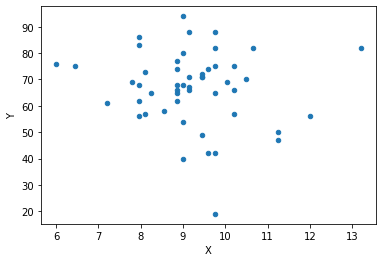

In [6]:
lines = pd.read_excel('data/lifeline.xls')
lines.plot.scatter(x = 'X', y = 'Y')

не очень похоже на связь

In [8]:
stats.pearsonr(lines.X, lines.Y)

(-0.122553650859522, 0.3965106928959566)

Отвергнуть предположение о том, что линейной связи между этими факторами нет мы не можем. На этих данных не верно предположение, что X и Y связаны.

# Задание 3
В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. 

Какие признаки влияют на расход топлива? Постройте (хорошую) линейную регрессионную модельдля предсказания расхода топлива по этим признакам. Интерпретируйте значения коэффициентоврегрессии (влияние каждого признака на отклик). Не забудьте о преобразовании признаков, еслиони будут нужны.


In [12]:
mtcars = pd.read_csv('data/auto.csv')
mtcars

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [16]:
mtcars[mtcars.name == 'toyota corolla']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
165,29.0,4,97.0,75,2171,16.0,75,3,toyota corolla
203,28.0,4,97.0,75,2155,16.4,76,3,toyota corolla
319,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla
351,32.4,4,108.0,75,2350,16.8,81,3,toyota corolla
376,34.0,4,108.0,70,2245,16.9,82,3,toyota corolla


In [28]:
0.16+0.0095*(sum([4+3+3+3+1+2+2+1+2]))

0.3595

In [26]:
mtcars_names = mtcars.groupby('name').aggregate('mean')[['cylinders', 'year']]
mtcars_names.to_csv('carnames.csv')

In [47]:
mtcars_names = pd.read_csv('carnames.csv')
mtcars = pd.merge(mtcars, mtcars_names[['name', 'cda']], how='left', on='name')

In [55]:
from sklearn.impute import SimpleImputer

In [71]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
mtcars['cda'] = imp_mean.fit_transform(np.array(mtcars.cda).reshape(-1, 1))

In [41]:
stats.ttest_ind(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)

Ttest_indResult(statistic=-4.864384956122782, pvalue=3.415937254419951e-05)

In [42]:
stats.ks_2samp(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)


KstestResult(statistic=0.7301587301587301, pvalue=0.0001328071108758211)

In [43]:
stats.mannwhitneyu(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)

In [73]:
m1 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cda', data=mtcars)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     221.1
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.92e-138
Time:                        00:15:06   Log-Likelihood:                -1022.9
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     383   BIC:                             2100.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.4051      5.347     -2.694   

## Решим задачу в ключе - какой эффект от этих переменных, при условии что все остальные неизменны
Для этого построим линейную регрессию и посмотрим на значимость коээфициентов при интересующих нас переменных

In [37]:
m1fitted.f_test("vs = am = 0")


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.75668509]]), p=0.4815897287884093, df_denom=21, df_num=2>

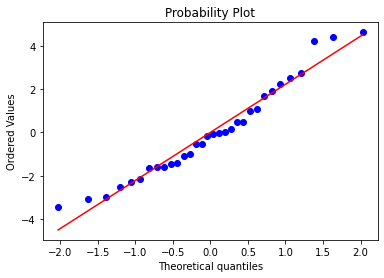

In [38]:

f = stats.probplot(m1fitted.resid, dist="norm", plot = plt)

### вывод
Тест Jarque-Bera на нормальность остатков и из визуальный анализ указывает, что гипотезу о их нормальном распределении отвергнуть нельзя.
Следовательно, можно говорить о том, что мы можем смотеть на выводы по значимости факторов

Как отдельно, так и вместе факторы типа двигателя и трансмиссии не вляют на экономичность авто, на этих данных, а влияет вес, объем и можность двигателя (воспользуемся случайным лесом ниже, чтобы вытащить относительную значимость факторов)

In [77]:
regr = RandomForestRegressor( random_state=0)
regr.fit(mtcars[mtcars.columns.difference(['mpg', 'name'])], mtcars.mpg)

RandomForestRegressor(random_state=0)

In [78]:
pd.DataFrame(zip(regr.feature_importances_, mtcars[mtcars.columns.difference(['mpg', 'name'])].columns)).sort_values(by=0, ascending=False)

,0,1
3,0.343152,displacement
6,0.224780,weight
2,0.152826,cylinders
4,0.121756,horsepower
7,0.118005,year
0,0.027560,acceleration
1,0.006279,cda
5,0.005642,origin


In [82]:
from sklearn.metrics import r2_score


In [83]:
yhat = regr.predict(mtcars[mtcars.columns.difference(['mpg', 'name'])])
r2_score(mtcars.mpg, yhat)

0.9827691824372229

## Решим задачу в ключе - какой эффект отдельно от типа двигателя и трансмиссии, без контроля остальных парамтеров.
Сделаем t-test и непараметрические тесты

In [72]:
mtcars.groupby('vs').mean()

,mpg,cyl,disp,hp,drat,wt,qsec,am,gear,carb
vs,,,,,,,,,,
0,16.616667,7.444444,307.150000,189.722222,3.392222,3.688556,16.693889,0.333333,3.555556,3.611111
1,24.557143,4.571429,132.457143,91.357143,3.859286,2.611286,19.333571,0.500000,3.857143,1.785714


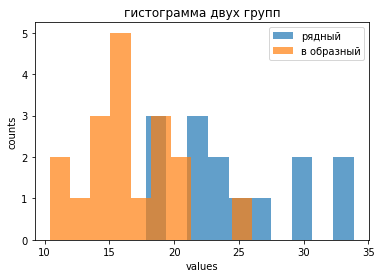

In [40]:
fig, ax = plt.subplots()
ax.hist(mtcars[mtcars.vs == 1].mpg, label='рядный', alpha = 0.7)
ax.hist(mtcars[mtcars.vs == 0].mpg, label='в образный', alpha = 0.7)

ax.legend()


ax.set_xlabel('values')
ax.set_ylabel('counts')
ax.set_title('гистограмма двух групп')
plt.show()

Ожидаем, что разница будет

In [41]:
stats.ttest_ind(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)

Ttest_indResult(statistic=-4.864384956122782, pvalue=3.415937254419951e-05)

In [42]:
stats.ks_2samp(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)


KstestResult(statistic=0.7301587301587301, pvalue=0.0001328071108758211)

In [43]:
stats.mannwhitneyu(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)

По всем тестам, мы можем отвергнуть гипотезу о равенстве расхода на 1% уровне значимости. Так как расход в американских милях на галлон - чем выше число, тем экономичнее машина.

У машин с рядными двигателями получается, что экономичность выше.

#### для коробок передач

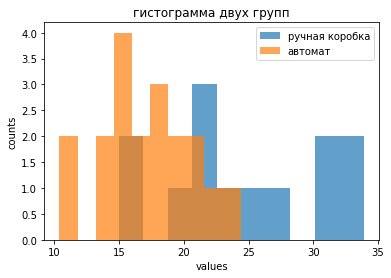

In [44]:
fig, ax = plt.subplots()
ax.hist(mtcars[mtcars.am == 1].mpg, label='ручная коробка', alpha = 0.7)
ax.hist(mtcars[mtcars.am == 0].mpg, label='автомат', alpha = 0.7)

ax.legend()


ax.set_xlabel('values')
ax.set_ylabel('counts')
ax.set_title('гистограмма двух групп')
plt.show()

In [45]:
stats.ttest_ind(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am != 0].mpg)


Ttest_indResult(statistic=-4.106126983100689, pvalue=0.0002850207439350686)

In [46]:
stats.ks_2samp(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am != 0].mpg)


KstestResult(statistic=0.6356275303643725, pvalue=0.00194012440784197)

In [47]:
stats.mannwhitneyu(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am != 0].mpg)


MannwhitneyuResult(statistic=42.0, pvalue=0.0009356956665892771)

# выводы
* Отдельно рассматривая, мы нашли значимую разницу - машины с рядным двигателем и машины с ручной коробкой экономичнее.
* Однако, принимая все переменные во внимание, видно что тип двигателя и коробки стоят на последнем  и предпоследнем месте по значимости влияния на расход топлива.
* Сильнее всего влияют вес, мощность и объем двигателя, а рядные двигатели и ручные коробки передач встречались в наших данных у легких и маломощных автомобилей в среднем.